In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
##Data Collection and Preprocessing

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()*(100/df.shape[0])

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:

age = df[['Age']]
imputer = KNNImputer(n_neighbors=2)
df['Age'] = imputer.fit_transform(age)
df.drop(columns=['Cabin'], inplace=True)


In [10]:

df
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
df.loc[df["Embarked"].isnull(), "Embarked"] = 'S'


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
## Data Analysis

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

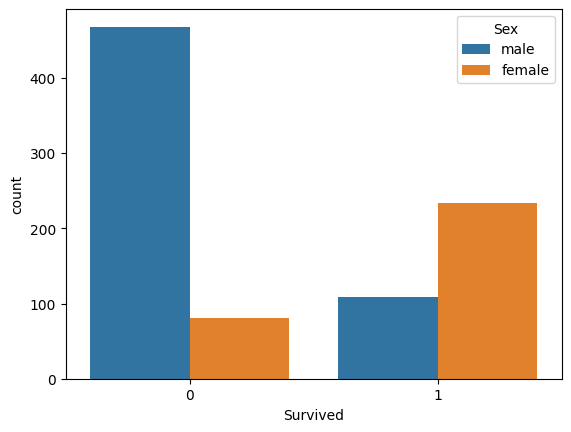

In [22]:
sns.countplot(x='Survived', hue='Sex', data=df)

In [23]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

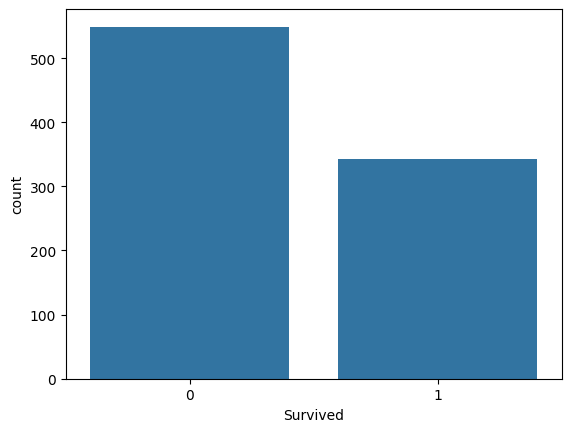

In [25]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

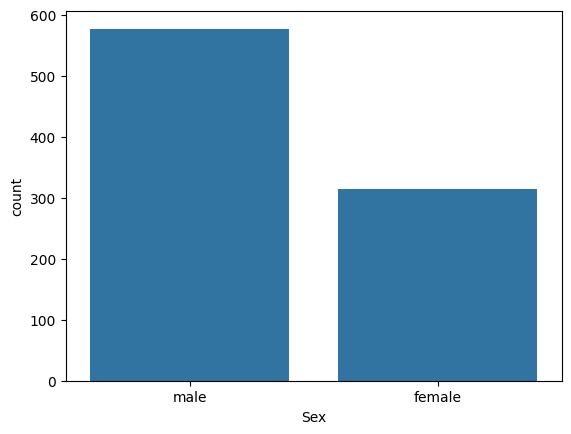

In [26]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

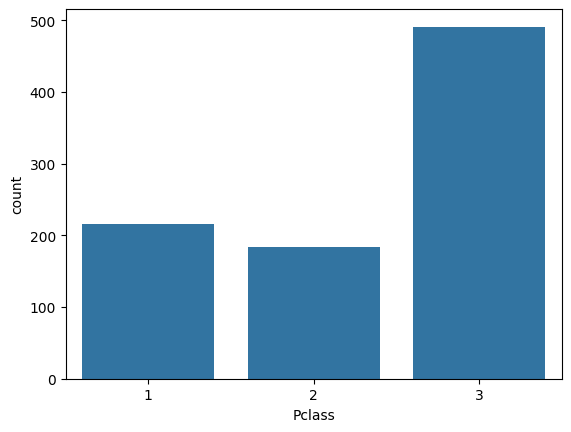

In [27]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

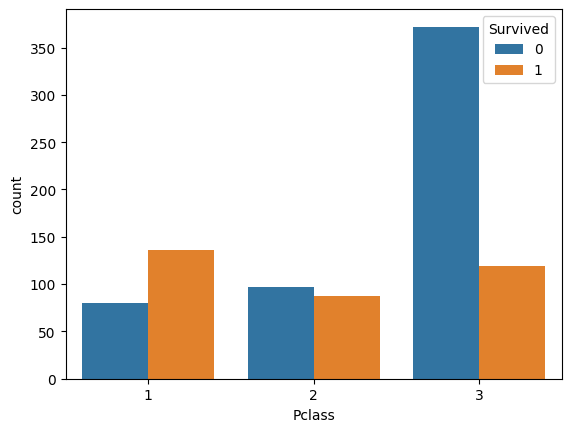

In [28]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [41]:
df.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


/tmp/ipykernel_16613/3847606198.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [60]:
x=df.drop(columns=["Name",'PassengerId','Ticket',"Survived"])
y=df["Survived"]
x
st=StandardScaler()
st.fit_transform(x)


array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426, -0.56883712],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324, -0.56883712],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104,  1.00518113],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783,  2.57919938]])

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

/home/illahi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
ypred=lr.predict(xtest)
# ypred_train=lr.predict(xtrain)

In [64]:
accuracy_score(ytest,ypred)
# accuracy_score(ytrain,ypred_train)


0.7988826815642458

In [65]:
dtc=DecisionTreeClassifier()
gbc=GradientBoostingClassifier(loss="log_loss",learning_rate=0.1,n_estimators=50)
rfc=RandomForestClassifier(n_estimators=1000)

abc=AdaBoostClassifier(estimator=dtc,n_estimators=1000)
Lr=LogisticRegression()
knc=KNeighborsClassifier(n_neighbors=4)

a={gbc:'GradientBoostingClassifier',rfc:'RandomForestClassifier',abc:'AdaBoostClassifier',Lr:'LogisticRegression',knc:'KNeighborsClassifier',dtc:'DecisionTreeClassifier'}
acc=[]
for model,name in a.items():
    m=model.fit(xtrain,ytrain)
    acc.append(accuracy_score(ytest,m.predict(xtest)))
acc

/home/illahi/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/illahi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.7988826815642458,
 0.8100558659217877,
 0.7821229050279329,
 0.7988826815642458,
 0.7206703910614525,
 0.7821229050279329]